<a href="https://colab.research.google.com/github/cynthiatcelorio/ML_Clustering/blob/main/dani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
%pip install clustimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
# librerias
from glob import glob
import matplotlib.pyplot as plt
from skimage import color
from skimage.color import rgb2gray
from skimage.io import imshow, imread
from clustimage import Clustimage
import numpy as np


import cv2
from natsort import natsorted 
from skimage import io

In [58]:
!git clone "https://github.com/cynthiatcelorio/ML_Clustering_Data.git"

ruta_train = "/content/ML_Clustering_Data/train"
ruta_test = "/content/ML_Clustering_Data/test"

fatal: destination path 'ML_Clustering_Data' already exists and is not an empty directory.


In [59]:
# Creamos un array con las rutas de las difetentes imágenes ordenadas alfabéticamente

train_images = glob('/content/ML_Clustering_Data/train/*')                
train_images = natsorted(train_images)

In [60]:
# Creamos un array para guardar los números que corresponden a las imágenes en orden alfabético
import glob, os

train_img_num = []

for file in glob.glob('/content/ML_Clustering_Data/train/*.jpg'):
    file = os.path.basename(file)
    file = file[:-4]
    train_img_num.append(file) 

train_img_num = natsorted(train_img_num)

In [61]:
len(train_images)         # wtf me sobra una

print(train_images[7889])
print(train_img_num[7888])

# Eso de ML_Clustering_Data revisarlo luego, puede dar problemas

IndexError: ignored

### Preprocesamiento de las imágenes (Probablemente no sirva, pero es el "Chulo"

Antes de extraer características de las imágenes, tenemos que llevar a cabo un preprocesamiento para poder comparar las imágenes en lo referente a color y valor.

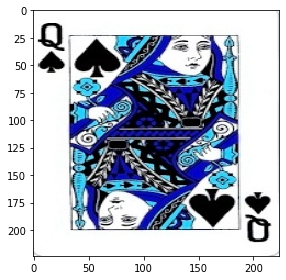

In [ ]:
import cv2

# Cargar dataset
images_entrenamiento = []

for i in range(0, len(train_images)):
    img = cv2.imread(train_images[i]) 
     
    images_entrenamiento.append(img)

io.imshow(images_entrenamiento[88])

La librería Clustimage cuenta con una función *imread* que premite escalar las imagenes a una dimensión concreta y pasarlas a escala de grises asignando al parámetro *colorscale* el valor 0.

In [ ]:
'''
# Inicializar
cl = Clustimage()

# Cargar dataset
images_entrenamiento = []

for i in range(0, len(train_images)):
    img = cl.imread(train_images[i], dim=(128, 128), colorscale=0, flatten=True)
    images_entrenamiento.append(img)


img = cl.imread(train_images[1980], dim=(128, 128), colorscale=1, flatten=True)

print(img)


# proximo objetivo: plottear como 9 a la vez, mirar por algun lado
plt.figure()
plt.imshow(img.reshape(128,128,3))
plt.axis('off')'''

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


"\nimg = cl.imread(train_images[1980], dim=(128, 128), colorscale=1, flatten=True)\n\nprint(img)\n\n\n# proximo objetivo: plottear como 9 a la vez, mirar por algun lado\nplt.figure()\nplt.imshow(img.reshape(128,128,3))\nplt.axis('off')"

In [ ]:
# Hacemos dos clusters con SKMEANS  (?) y así lo separamos mayoritariamente entre el fondo de la carta y el dibujo

img = images_entrenamiento[7]

img2 = img.reshape((-1, 3))
img2 = np.float32(img2)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Clusters
k=2

attempts = 10
ret,label,center=cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
from sklearn.cluster import KMeans

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2.imwrite("aaaa.jpg", res2)

io.imshow(res2)

### Preprocesamiento de las imágenes (Este está "mejor hecho") (Da menos problemas)

In [62]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [63]:
from imutils import paths
import cv2

imagePaths = list(paths.list_images(ruta_train))
imagePaths = natsorted(imagePaths)

In [64]:
# Creamos un array para guardar los números que corresponden a las imágenes en orden alfabético
import glob, os

train_img_num = []

for file in glob.glob('/content/ML_Clustering_Data/train/*.jpg'):
    file = os.path.basename(file)
    file = file[:-4]
    train_img_num.append(file) 

train_img_num = natsorted(train_img_num)

In [218]:
from google.colab.patches import cv2_imshow
images_entrenamiento = []
cropped = []
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(image, (224, 224))
    image=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)



    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
    bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
    out_gray=cv2.divide(image, bg, scale=255)
    out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 
    
    
    #from skimage import feature
    #edge = feature.canny(out_binary)










    images_entrenamiento.append(out_binary)
    cropped.append(out_binary[10:100, 0:90])


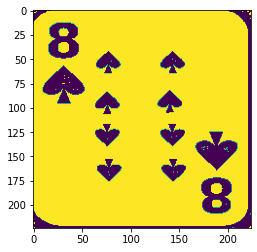

In [219]:
from skimage import io
#io.imshow(images_entrenamiento[555])

plt.imshow(images_entrenamiento[1653])


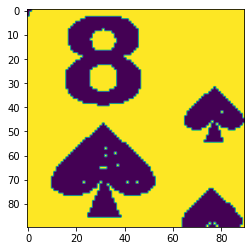

In [220]:
#io.imshow(cropped[555])

plt.imshow(cropped[1653])


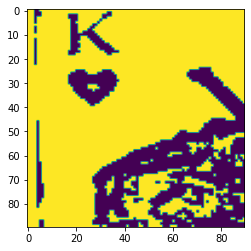

In [251]:
plt.imshow(cropped[566])

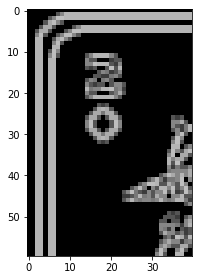

In [121]:
# Algo como se esto se podría hacer

from skimage import filters

io.imshow(filters.prewitt(cropped[6633]))

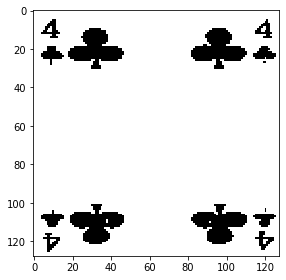

In [17]:
'''
io.imshow(images_entrenamiento[30])

imgg = images_entrenamiento[30]
ret,thresh = cv2.threshold(imgg,127,255,0)

## Get contours
contours,h = cv2.findContours(thresh,cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

## only draw contour that have big areas
imx = imgg.shape[0]
imy = imgg.shape[1]
lp_area = (imx * imy) / 10   '''

rectangle


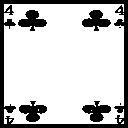

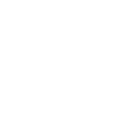

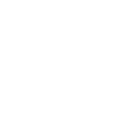

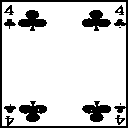

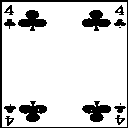

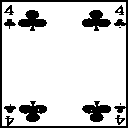

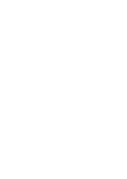

In [18]:
'''
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")
    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    # return the ordered coordinates
    return rect


def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))
    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))
    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    # return the warped image
    return warped


#################################################################


## Get only rectangles given exceeding area
for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01 * cv2.arcLength(cnt, True), True)
    ## calculate number of vertices
    #print(len(approx))


    if len(approx) == 4 and cv2.contourArea(cnt) > lp_area:
        print("rectangle")

        tmp_img = imgg.copy()
        cv2.drawContours(tmp_img, [cnt], 0, (0, 255, 255), 6)
        cv2_imshow(tmp_img)
        cv2.waitKey(0)


        tmp_img = imgg.copy()
        cv2.drawContours(tmp_img, [cnt], 0, (255, 0, 255), -1)
        cv2_imshow(tmp_img)
        cv2.waitKey(0)


        # Make a hull arround the contour and draw it on the original image
        tmp_img = imgg.copy()
        mask = np.zeros((imgg.shape[:2]), np.uint8)
        hull = cv2.convexHull(cnt)
        cv2.drawContours(mask, [hull], 0, (255, 255, 255), -1)
        cv2_imshow(mask)
        cv2.waitKey(0)


        # Draw minimum area rectangle
        tmp_img = imgg.copy()
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(tmp_img, [box], 0, (0, 0, 255), 2)
        cv2_imshow(tmp_img)
        cv2.waitKey(0)


        # Draw bounding rectangle
        tmp_img = imgg.copy()
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(tmp_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2_imshow(tmp_img)
        cv2.waitKey(0)


        # Bounding Rectangle and Minimum Area Rectangle
        tmp_img = imgg.copy()
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(tmp_img, [box], 0, (0, 0, 255), 2)
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(tmp_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2_imshow(tmp_img)
        cv2.waitKey(0)


        # determine the most extreme points along the contour
        # https://www.pyimagesearch.com/2016/04/11/finding-extreme-points-in-contours-with-opencv/
        tmp_img = imgg.copy()
        extLeft = tuple(cnt[cnt[:, :, 0].argmin()][0])
        extRight = tuple(cnt[cnt[:, :, 0].argmax()][0])
        extTop = tuple(cnt[cnt[:, :, 1].argmin()][0])
        extBot = tuple(cnt[cnt[:, :, 1].argmax()][0])
        cv2.drawContours(tmp_img, [cnt], -1, (0, 255, 255), 2)
        cv2.circle(tmp_img, extLeft, 8, (0, 0, 255), -1)
        cv2.circle(tmp_img, extRight, 8, (0, 255, 0), -1)
        cv2.circle(tmp_img, extTop, 8, (255, 0, 0), -1)
        cv2.circle(tmp_img, extBot, 8, (255, 255, 0), -1)


                ## Perspective Transform
        tmp_img = imgg.copy()
        pts = np.array([extLeft, extRight, extTop, extBot])
        warped = four_point_transform(tmp_img, pts)
        cv2_imshow(warped)
        cv2.waitKey(0)

'''


        cv2_imshow(tmp_img)
        cv2.waitKey(0)
        #cv2.destroyAllWindows()
'''



cv2.destroyAllWindows() '''

### Preprocesamiento de las imágenes (TEST)

In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [264]:
from imutils import paths
import cv2

imagePaths = list(paths.list_images(ruta_test))
imagePaths = natsorted(imagePaths)

In [265]:
# Creamos un array para guardar los números que corresponden a las imágenes en orden alfabético
import glob, os

test_img_num = []

for file in glob.glob('/content/ML_Clustering_Data/test/*.jpg'):
    file = os.path.basename(file)
    file = file[:-4]
    test_img_num.append(file) 

test_img_num = natsorted(test_img_num)

In [266]:
from google.colab.patches import cv2_imshow
images_entrenamiento_test = []
cropped_test = []
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(image, (224, 224))
    image=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)



    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
    bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
    out_gray=cv2.divide(image, bg, scale=255)
    out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 
    
    
    #from skimage import feature
    #edge = feature.canny(out_binary)










    images_entrenamiento_test.append(out_binary)
    cropped_test.append(out_binary[10:100, 0:90])


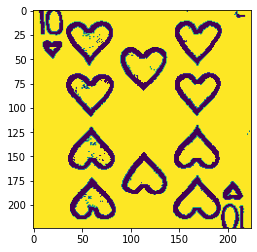

In [268]:
from skimage import io
#io.imshow(images_entrenamiento[555])

plt.imshow(images_entrenamiento_test[22])


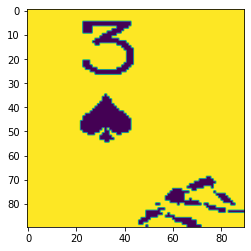

In [269]:
#io.imshow(cropped[555])

plt.imshow(cropped_test[55])


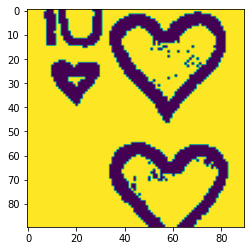

In [270]:
plt.imshow(cropped_test[22])

### Entrenamiento del modelo

In [271]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, max_iter=1000)

cropped_flat = []
cropped_flat_test = []
for i in range(0, len(cropped_test)):
    img = cropped[i].ravel()
    #cropped_flat.append(img)
    cropped_flat_test.append(img)

kmeans_model = km.fit_transform(cropped_flat_test)

In [ ]:
km_centroids = km.cluster_centers_
km_centroids.shape

In [272]:
y = km.predict(cropped_flat_test)

In [273]:
import numpy
import sys

numpy.set_printoptions(threshold=sys.maxsize)

y

array([2, 4, 0, 4, 0, 0, 4, 4, 4, 1, 1, 3, 1, 4, 1, 4, 4, 4, 1, 1, 4, 1,
       0, 0, 4, 4, 3, 2, 1, 0, 1, 3, 4, 4, 1, 1, 2, 3, 1, 1, 3, 0, 1, 0,
       4, 4, 3, 3, 2, 4, 0, 1, 1, 4, 4, 4, 4, 0, 1, 0, 3, 1, 0, 0, 1, 0,
       4, 1, 0, 0, 1, 4, 2, 0, 4, 4, 4, 4, 4, 1, 1, 4, 1, 4, 4, 0, 1, 4,
       3, 0, 4, 4, 3, 2, 1, 1, 4, 4, 4, 1, 1, 0, 4, 1, 4, 1, 4, 0, 4, 4,
       4, 4, 4, 1, 3, 3, 1, 1, 0, 1, 1, 4, 1, 4, 0, 4, 4, 0, 4, 3, 4, 4,
       4, 1, 1, 3, 4, 4, 1, 0, 4, 4, 0, 1, 0, 0, 4, 1, 0, 1, 1, 0, 3, 4,
       2, 3, 4, 1, 1, 0, 0, 3, 1, 1, 4, 4, 0, 0, 4, 1, 3, 4, 1, 3, 0, 3,
       0, 0, 1, 0, 0, 4, 4, 1, 0, 1, 1, 0, 1, 4, 4, 0, 4, 4, 0, 1, 1, 2,
       1, 3, 4, 3, 1, 1, 4, 4, 0, 4, 4, 0, 1, 3, 4, 0, 3, 0, 4, 1, 1, 4,
       4, 0, 4, 3, 1, 1, 1, 1, 2, 4, 1, 1, 4, 0, 3, 0, 4, 2, 3, 0, 1, 4,
       2, 1, 1, 1, 4, 4, 1, 0, 1, 4, 4, 1, 1, 1, 4, 0, 1, 1, 0, 4, 4, 0,
       1], dtype=int32)

### ARI

## Otros

In [275]:
import pandas as pd

submission = pd.DataFrame()
submission['id'] = test_img_num
submission['suit'] = y

submission.to_csv("submission_grupo24.csv", index=False)
from google.colab import files
files.download('submission_grupo24.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ajustes básicos de imágenes (Escala de grises, rotar y recortar)

https://www.youtube.com/watch?v=uDNqNv2N-pY&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=19

Image segmentation

https://www.youtube.com/watch?v=6CqRnx6Ic48&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=52

Edición de imagen que hemos utilizado

https://stackoverflow.com/questions/62042172/how-to-remove-noise-in-image-opencv-python

Girar imágenes según su contorno

https://stackoverflow.com/questions/64860785/opencv-using-canny-and-shi-tomasi-to-detect-round-corners-of-a-playing-card

Más preprocesamiento de imágenes

https://www.instintoprogramador.com.mx/2020/11/tutorial-de-procesamiento-de-imagenes.html